## Project Analysis & Visualizations 

### Imports

In [1]:
# Initial imports 
import os
import datetime as dt
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib

%matplotlib inline

import matplotlib.pyplot as plt
import panel as pn
import plotly.express as px
from pathlib import Path

In [2]:
# Initialize the Panel Extensions (for Plotly)
pn.extension("plotly")

In [3]:
# Import hvplot.pandas after pn.extension
import hvplot.pandas

## Research Question 1: Portfolio Analysis

Based on the defined strategy applied to the S&P 500 stocks, what are the top ten companies returning the highest profit?

### Reading in the CSV data

The first table displays the top ten stocks comprising the Profitable Portfolio. The algorithm used to determine the stocks in this portfolio can be found in the "profitable_portfolio" notebook. 

In [8]:
# Read in the proftiable portfolio csv
profitable_portfolio_df = Path("resources/top_profitable_stock.csv")
profitable_portfolio_df = pd.read_csv(profitable_portfolio_df)

# Remove the uncessessary columns
profitable_portfolio_df = profitable_portfolio_df.drop(columns=["Unnamed: 0"])

# Display the df
profitable_portfolio_df


symbol    profit                  sector
0   AMZN  791870.0  Consumer Discretionary
1    BIO  512990.0             Health Care
2    NOW  315080.0  Information Technology
3   MSCI  309330.0              Financials
4   IPGP  265020.0  Information Technology
5   SPGI  247000.0              Financials
6   NFLX  242020.0  Communication Services
7    TDY  182080.0             Industrials
8    PNC  181710.0              Financials
9   MKTX  176950.0              Financials

In [5]:
# Read in the portfolio closing prices csv
portfolio_close_prices_df = Path("resources/top_prof_stock_prices.csv")
portfolio_close_prices_df = pd.read_csv(portfolio_close_prices_df, 
                                        index_col="date", 
                                        infer_datetime_format=True, 
                                        parse_dates=True)



# Display the df
portfolio_close_prices_df.head()


SP   MKTX    PNC     TDY    NFLX    SPGI   IPGP   MSCI    NOW  \
date                                                                           
2015-07-27  25.26  97.95  97.51  102.67  106.43   99.59  79.86  65.73  76.34   
2015-07-28  25.57  97.66  98.14  103.67  106.90   98.40  89.71  66.00  78.63   
2015-07-29  25.77  98.16  98.55  104.99  107.08  101.48  93.30  66.91  77.98   
2015-07-30  25.83  97.07  98.67  103.70  111.56  102.84  92.56  67.97  81.03   
2015-07-31  26.15  97.80  98.18  103.67  114.31  101.75  92.22  68.16  80.50   

               BIO    AMZN  
date                        
2015-07-27  146.45  531.41  
2015-07-28  149.45  526.03  
2015-07-29  150.46  529.00  
2015-07-30  150.81  536.76  
2015-07-31  150.74  536.15

### Portfolio Returns 

In [6]:
# Calculate the daily returns from the closing prices 
portfolio_daily_returns = portfolio_close_prices_df.pct_change()

# Display the returns 
portfolio_daily_returns.head()

SP      MKTX       PNC       TDY      NFLX      SPGI  \
date                                                                     
2015-07-27       NaN       NaN       NaN       NaN       NaN       NaN   
2015-07-28  0.012272 -0.002961  0.006461  0.009740  0.004416 -0.011949   
2015-07-29  0.007822  0.005120  0.004178  0.012733  0.001684  0.031301   
2015-07-30  0.002328 -0.011104  0.001218 -0.012287  0.041838  0.013402   
2015-07-31  0.012389  0.007520 -0.004966 -0.000289  0.024650 -0.010599   

                IPGP      MSCI       NOW       BIO      AMZN  
date                                                          
2015-07-27       NaN       NaN       NaN       NaN       NaN  
2015-07-28  0.123341  0.004108  0.029997  0.020485 -0.010124  
2015-07-29  0.040018  0.013788 -0.008267  0.006758  0.005646  
2015-07-30 -0.007931  0.015842  0.039113  0.002326  0.014669  
2015-07-31 -0.003673  0.002795 -0.006541 -0.000464 -0.001136

In [7]:
# Create a line plot using hvplot for portfolio returns

hvlineplot_portfolioreturns = portfolio_daily_returns.hvplot(label="Proftiable Portfolio Returns",
                                                       legend=True,
                                                       height=500,
                                                       width=900)

# Display the line plot for portfolio returns
hvlineplot_portfolioreturns


:NdOverlay   [Variable]
   :Curve   [date]   (value)

### Portfolio Cumulative Returns

In [8]:
# Calculate the portfolio's cumulative returns
portfolio_cumulative_returns = (1 + portfolio_daily_returns).cumprod() - 1

# Display the cumulative returns
portfolio_cumulative_returns.head()


SP      MKTX       PNC       TDY      NFLX      SPGI  \
date                                                                     
2015-07-27       NaN       NaN       NaN       NaN       NaN       NaN   
2015-07-28  0.012272 -0.002961  0.006461  0.009740  0.004416 -0.011949   
2015-07-29  0.020190  0.002144  0.010666  0.022597  0.006107  0.018978   
2015-07-30  0.022565 -0.008984  0.011896  0.010032  0.048201  0.032634   
2015-07-31  0.035234 -0.001531  0.006871  0.009740  0.074039  0.021689   

                IPGP      MSCI       NOW       BIO      AMZN  
date                                                          
2015-07-27       NaN       NaN       NaN       NaN       NaN  
2015-07-28  0.123341  0.004108  0.029997  0.020485 -0.010124  
2015-07-29  0.168295  0.017952  0.021483  0.027381 -0.004535  
2015-07-30  0.159028  0.034079  0.061436  0.029771  0.010068  
2015-07-31  0.154771  0.036969  0.054493  0.029293  0.008920

In [9]:
# Create a line plot using hvplot for cumulative returns
hvlineplot_cumulative_returns = portfolio_cumulative_returns.hvplot(label="Proftiable Portfolio Cumulative Returns",
                                                                    legend=True,
                                                                    height=500,
                                                                    width=900)

# Display the line plot for portfolio returns
hvlineplot_cumulative_returns

:NdOverlay   [Variable]
   :Curve   [date]   (value)

#### Portfolio performance against the S&P 500

It appears 90% of the stocks in the Profitable Portfolio outperform the S&P 500. One performer that appears to follow the S&P 500 closely is PNC Financial Services Group (ticker: PNC). 

### Profitability Distribution

This visualization displays the profit distribution in the Profitable Portfolio

In [5]:
# Use the proftiable_portfolio_df dataset to create a proftiability distribution pie chart
profitable_portfolio_df

symbol    profit                  sector
0   AMZN  791870.0  Consumer Discretionary
1    BIO  512990.0             Health Care
2    NOW  315080.0  Information Technology
3   MSCI  309330.0              Financials
4   IPGP  265020.0  Information Technology
5   SPGI  247000.0              Financials
6   NFLX  242020.0  Communication Services
7    TDY  182080.0             Industrials
8    PNC  181710.0              Financials
9   MKTX  176950.0              Financials

In [6]:
# Create a pie graph using the plotly express function 
profitability_distribution_piechart = px.pie(profitable_portfolio_df,
                                values="profit",
                                names="symbol",
                                title="Portfolio Profitability Distribution")
                                
# Display the pie chart
profitability_distribution_piechart.show()

In [7]:
# Sunburst chart displaying the profit distribution

profit_distribution_sunburstchart = px.sunburst(profitable_portfolio_df, 
                                                path = ["sector", "symbol"],
                                                values = "profit",
                                                hover_data = ["sector"],
                                                color = "profit",
                                                color_continuous_scale="ice",
                                                title="Profit Distribution in the Profitable Portfolio")


profit_distribution_sunburstchart




### Determining the weights in the Profitable Portfolio

In [12]:
# Calculate the weights of each stock in the Profitable Portfolio

# Index the profitable_portfolio_df 
profitable_portfolio = profitable_portfolio_df.set_index("symbol")

# Display the new dataset 
profitable_portfolio

profit                  sector
symbol                                  
AMZN    791870.0  Consumer Discretionary
BIO     512990.0             Health Care
NOW     315080.0  Information Technology
MSCI    309330.0              Financials
IPGP    265020.0  Information Technology
SPGI    247000.0              Financials
NFLX    242020.0  Communication Services
TDY     182080.0             Industrials
PNC     181710.0              Financials
MKTX    176950.0              Financials

In [13]:
# Calculate the stock weights 
profitable_portfolio_sum = sum(profitable_portfolio['profit'])
weighted_profitable_portfolio = profitable_portfolio['profit'] / profitable_portfolio_sum

# Display the weighted dataset
weighted_profitable_portfolio


symbol
AMZN    0.245613
BIO     0.159114
NOW     0.097728
MSCI    0.095945
IPGP    0.082201
SPGI    0.076612
NFLX    0.075067
TDY     0.056476
PNC     0.056361
MKTX    0.054884
Name: profit, dtype: float64

## Research Question 3:

### Portfolio Volatility

This section can be used to accompany the risk analysis of the portfolio

In [14]:
# Calculate the portfolio's volatility to compare against the S&P 500
profitable_portfolio_volatility = portfolio_cumulative_returns.std()

# Display the portfolio volatility
profitable_portfolio_volatility

SP      0.271646
MKTX    1.045617
PNC     0.239972
TDY     0.846191
NFLX    1.087241
SPGI    0.661241
IPGP    0.622163
MSCI    1.211761
NOW     1.235067
BIO     0.615393
AMZN    1.113907
dtype: float64

In [15]:
# Stocks that have a greater volatility than the S&P 500
portfolio_cumulative_returns["SP"].std() < profitable_portfolio_volatility

SP      False
MKTX     True
PNC     False
TDY      True
NFLX     True
SPGI     True
IPGP     True
MSCI     True
NOW      True
BIO      True
AMZN     True
dtype: bool

#### Stocks in the Profitable Portfolio with greater risk than the S&P 500

90% of the Profitable Portfolio stocks have a higher volatility than the S&P 500 (tickers: MKTX, TDY, NFLX, SPGI, IPGP, MSCI, NOW, BIO, AMZN)

In [16]:
# Calculate the rolling volatility over a 120 day day window
portfolio_rolling_volatility = portfolio_daily_returns.rolling(window=120).std()

# Display the data
portfolio_rolling_volatility.tail()


SP      MKTX       PNC       TDY      NFLX      SPGI  \
date                                                                     
2020-07-20  0.059595  0.036911  0.047976  0.042675  0.032059  0.039484   
2020-07-21  0.059661  0.036838  0.048175  0.042685  0.032115  0.039498   
2020-07-22  0.059670  0.036846  0.048154  0.042727  0.032104  0.039494   
2020-07-23  0.059670  0.036984  0.048142  0.042867  0.032193  0.039507   
2020-07-24  0.059676  0.036996  0.048137  0.043006  0.032040  0.039506   

                IPGP      MSCI       NOW       BIO      AMZN  
date                                                          
2020-07-20  0.043104  0.043352  0.039607  0.030198  0.027681  
2020-07-21  0.042842  0.043342  0.039700  0.030203  0.027761  
2020-07-22  0.042862  0.043231  0.038868  0.030195  0.027804  
2020-07-23  0.042774  0.043186  0.038930  0.030139  0.027317  
2020-07-24  0.042692  0.043145  0.038942  0.030156  0.027314

In [18]:
# Create a line chart display the data using hvPlot
rolling_volatility_hvplot = portfolio_rolling_volatility.hvplot(label="Rolling Portfolio Volatility",
                                                                legend=True,
                                                                height=500,
                                                                width=900)



# Display the plot
rolling_volatility_hvplot



:NdOverlay   [Variable]
   :Curve   [date]   (value)

#### Portfolio volatility reaction

Based on a 120 day rolling standard deviaition, it appears the volatiltiy for the stocks in the Profitable Portfolio follow the market volatility.  

### Moving Average for Amazon 

This section provides a better understanding how the algorithm works to determine the ten most profitable stocks from the S&P 500.

In [19]:
# Import the amazon csv 
amzn_df = Path("resources/sample_moving_amzn.csv")
amzn_df = pd.read_csv(amzn_df)

# Display the df
amzn_df.head()

date   close        50ma       100ma
0  2015-07-27  531.41  531.410000  531.410000
1  2015-07-28  526.03  528.720000  528.720000
2  2015-07-29  529.00  528.813333  528.813333
3  2015-07-30  536.76  530.800000  530.800000
4  2015-07-31  536.15  531.870000  531.870000

In [20]:
# Create an hv line plot
amzn_df.hvplot()

:NdOverlay   [Variable]
   :Curve   [index]   (value)

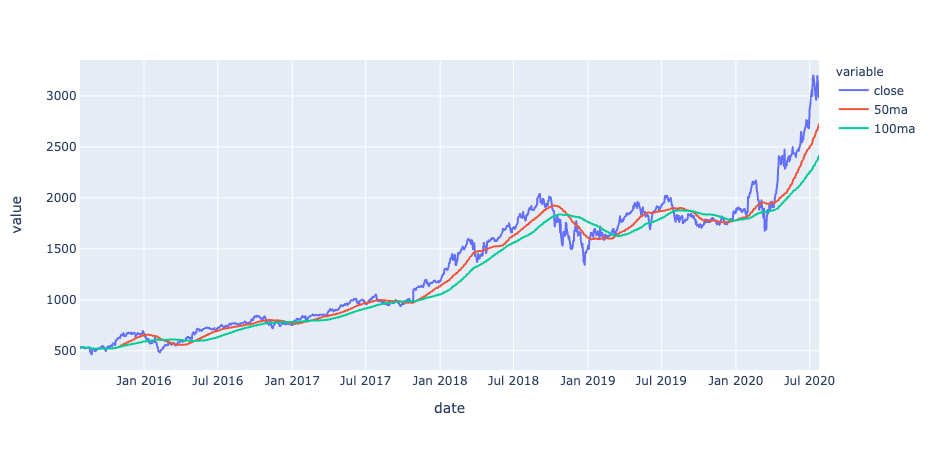

In [65]:
# Create a plotly express line plot 

# First, manipulate the original amzn_df using the pd.melt function
amzn_new_df = pd.melt(amzn_df, id_vars=['date'], value_vars=['close', '50ma', '100ma'])

# Plot the px line figure 
amzn_pxlineplot = px.line(amzn_new_df, 
                          x='date', 
                          y='value', 
                          color='variable')

amzn_pxlineplot.show()
